In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [4]:
#!kaggle datasets download -d mirosval/personal-cars-classifieds

In [5]:
#!ls

In [6]:
#unzipping the zip files and deleting the zip files
#!unzip \*.zip  && rm *.zip

In [7]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (15, 8)
sns.set(rc={'figure.figsize':(15,8)})

In [8]:
data = pd.read_csv("car_ads.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


- Variable Identification
- Univariate Analysis
- Bi-variate Analysis
- Missing values treatment
- Outlier treatment
- Variable transformation
- Variable creation

In [9]:
data.head(1)

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75


In [10]:
#data.dtypes

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   color_slug           object 
 8   stk_year             object 
 9   transmission         object 
 10  door_count           object 
 11  seat_count           object 
 12  fuel_type            object 
 13  date_created         object 
 14  date_last_seen       object 
 15  price_eur            float64
dtypes: float64(5), object(11)
memory usage: 433.7+ MB


# Variable Identification:
 First, identify Predictor (Input) and Target (output) variables. Next, identify the data type and category of the variables.
- **Type of variable**: *``maker, model, mileage, manufacture_year, engine_displacement, engine_power, body_type, color_slug, stk_year, transmission, door_count, seat_count, fuel_type, date_created``* and *``date_last_seen``* are predictor variables. *``price_eur``* is the target variable, it is dependent on predictor variables.

- **Data type**: Currently, 5 columns are of ```float64``` type and 11 columns are ```object``` type. We will convert columns like ```door_count``` and ```seat_count``` into integers.

In [12]:
# door_count and seat_count has None values so we are replacing them with nan to perform fillna in future. We can't convert None to float as well.
data['door_count'].replace('None', np.nan, inplace=True)
data['seat_count'].replace('None', np.nan, inplace=True)

In [13]:
data['door_count'] = data['door_count'].astype('float')
data['seat_count'] = data['seat_count'].astype('float')

# Missing Values Treatment

We will first find number of missing values in each column.

In [14]:
data.isnull().sum()

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               1708156
transmission            741630
door_count             1090066
seat_count             1287099
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64

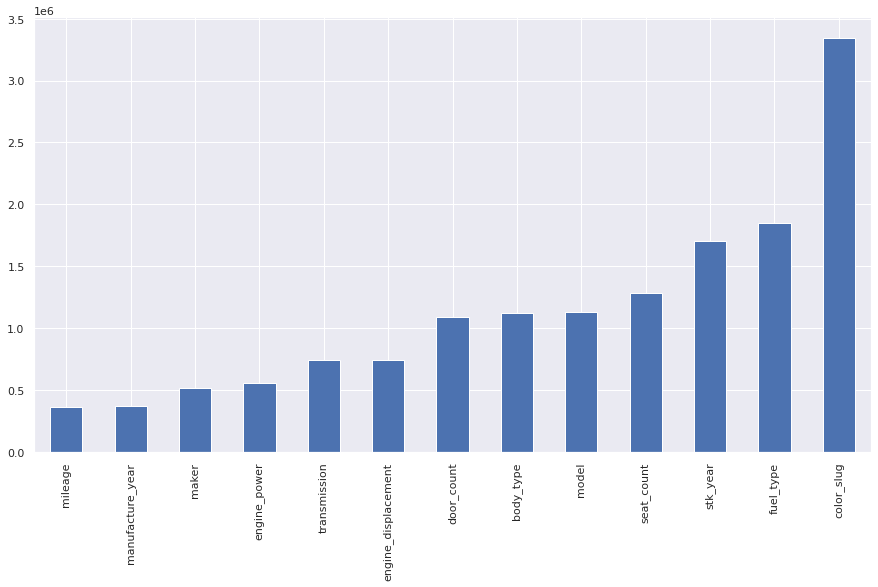

In [15]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

We will now remove the columns with very high number of missing values. Here, we will drop ```stk_year```, ```fuel_type``` and ```color_slug``` as they have high number of missing values.

In [16]:
data = data.drop(['stk_year', 'fuel_type', 'color_slug'], axis = 1) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   transmission         object 
 8   door_count           float64
 9   seat_count           float64
 10  date_created         object 
 11  date_last_seen       object 
 12  price_eur            float64
dtypes: float64(7), object(6)
memory usage: 352.4+ MB


We are dropping the ```date_created``` and ```date_last_seen``` column as they are related to scraping and doesn't contribute to price prediction.

In [17]:
data = data.drop(['date_created', 'date_last_seen'], axis=1)

In [18]:
data.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,man,5.0,7.0,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,man,5.0,5.0,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,man,5.0,5.0,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,man,5.0,5.0,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,man,5.0,5.0,2738.71


**Door count**

In [19]:
data['door_count'].unique()

array([ 5.,  3.,  4., nan,  2.,  6.,  1.,  7.,  9.,  8., 77., 58., 54.,
        0., 55., 22., 45., 17., 49.])

In [20]:
data['door_count'].value_counts()

4.0     1130741
5.0      894084
2.0      307824
3.0      120593
0.0        8010
6.0        1253
1.0         273
7.0          43
55.0          9
9.0           4
8.0           3
58.0          3
22.0          1
17.0          1
77.0          1
45.0          1
49.0          1
54.0          1
Name: door_count, dtype: int64

We will remove data with more than 8 as the value of ```door_count```.

In [21]:
data = data.drop(data[data['door_count']  >= 8].index)

In [22]:
data['door_count'] = data['door_count'].fillna(data['door_count'].mode()[0])

**Seat count**

In [23]:
data['seat_count'].unique()

array([  7.,   5.,   4.,  nan,   6.,   9.,   8.,   2.,   3.,   1.,  18.,
        20.,  10.,  11.,  15.,  12.,  16.,  14.,  50.,  17.,  74.,  65.,
        19.,  54.,  13.,  27.,  45.,  24.,  56.,  22., 255.,  23.,  57.,
        25.,  51.,  55.,  61.,  21.,  53.,  26.,  58.,  30.,  36.,   0.,
        29.,  52.,  32.,  44., 512.,  33., 515.,  59.,  85., 517.,  81.,
        43.,  49., 138.])

In [24]:
data['seat_count'].value_counts()

5.0      1767856
4.0       244797
7.0       100744
2.0        72684
3.0        33606
6.0        14174
9.0        12574
0.0        11690
8.0         6754
1.0          567
17.0          39
10.0          35
12.0          31
14.0          19
15.0          19
18.0          16
19.0          14
21.0          13
23.0          13
45.0          13
20.0          13
13.0          10
50.0           9
16.0           9
55.0           8
11.0           8
57.0           7
51.0           7
58.0           6
56.0           5
25.0           4
54.0           4
52.0           3
24.0           3
29.0           3
81.0           3
36.0           3
53.0           3
512.0          2
74.0           2
27.0           2
49.0           2
44.0           2
33.0           2
32.0           2
30.0           2
255.0          1
43.0           1
59.0           1
61.0           1
65.0           1
22.0           1
85.0           1
517.0          1
515.0          1
138.0          1
26.0           1
Name: seat_count, dtype: int64

In [25]:
data = data.drop(data[data['seat_count']  > 9].index)

In [26]:
data['seat_count'] = data['seat_count'].fillna(data['seat_count'].mode()[0])

**Mileage**

As the mileage of a car can't be zero, zero and some values near to it are removed from the data. 

In [27]:
df = data[data['mileage']  < 3]
df['mileage'].value_counts()

0.0    162371
1.0     34689
2.0      7111
Name: mileage, dtype: int64

In [28]:
data = data.drop(data[data['mileage']  <3].index)

In [29]:
data['mileage'].isna().sum()

362584

In [30]:
data['mileage'].fillna(data['mileage'].mean(), inplace=True)

**Model**

In [31]:
data['model'].fillna(data['model'].mode()[0], inplace=True)
data['model'] = data['model'].astype('str')

**Maker**

In [32]:
data['maker'].isna().sum()

488961

In [33]:
data['maker'].fillna(data['maker'].mode()[0], inplace=True)
data['maker'] = data['maker'].astype('str')

**Engine Power**

In [34]:
data['engine_power'].isna().sum()

529704

In [35]:
data['engine_power'].fillna(data['engine_power'].mean(), inplace=True)

**Manufacture year**

In [36]:
#data[data['manufacture_year'] <1886]['manufacture_year'].value_counts()

In [37]:
# removing data which has manufacture_year less than 1886 as car was invented in 1886.

data = data.drop(data[data['manufacture_year'] <1886].index)

**Engine Displacement**

In [38]:
data['engine_displacement'].fillna(data['engine_displacement'].mean(), inplace=True)

**Body Type**

In [39]:
data['body_type'].fillna(data['body_type'].mode()[0], inplace=True)
data['body_type'] = data['body_type'].astype('str')

**Transmission**

In [40]:
data['transmission'].fillna(data['transmission'].mode()[0], inplace=True)

**Manufacture year**

In [41]:
data = data.drop(data[data['manufacture_year'].isnull() == True].index)

In [42]:
data.isnull().sum()

maker                  0
model                  0
mileage                0
manufacture_year       0
engine_displacement    0
engine_power           0
body_type              0
transmission           0
door_count             0
seat_count             0
price_eur              0
dtype: int64

In [43]:
data.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,other,man,5.0,7.0,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,other,man,5.0,5.0,8882.31
2,bmw,octavia,97676.0,2010.0,1995.0,85.0,other,man,5.0,5.0,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,other,man,5.0,5.0,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,other,man,5.0,5.0,2738.71


In [44]:
data['door_count']=data['door_count'].astype('int')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3069090 entries, 0 to 3552910
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   transmission         object 
 8   door_count           int64  
 9   seat_count           float64
 10  price_eur            float64
dtypes: float64(6), int64(1), object(4)
memory usage: 281.0+ MB


# Univariate Analysis

- Continuous variable => Histogram, Box plot

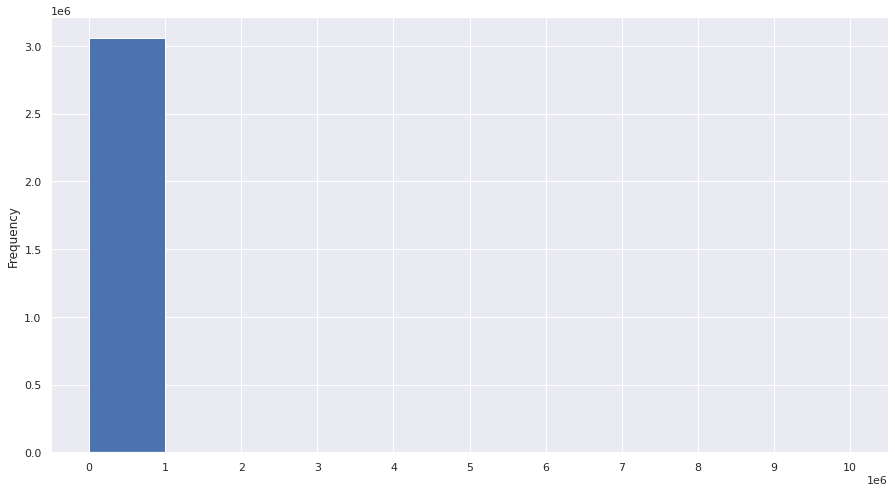

In [46]:
count, bin_edges = np.histogram(data['mileage'])
data['mileage'].plot(kind = 'hist', xticks= bin_edges)

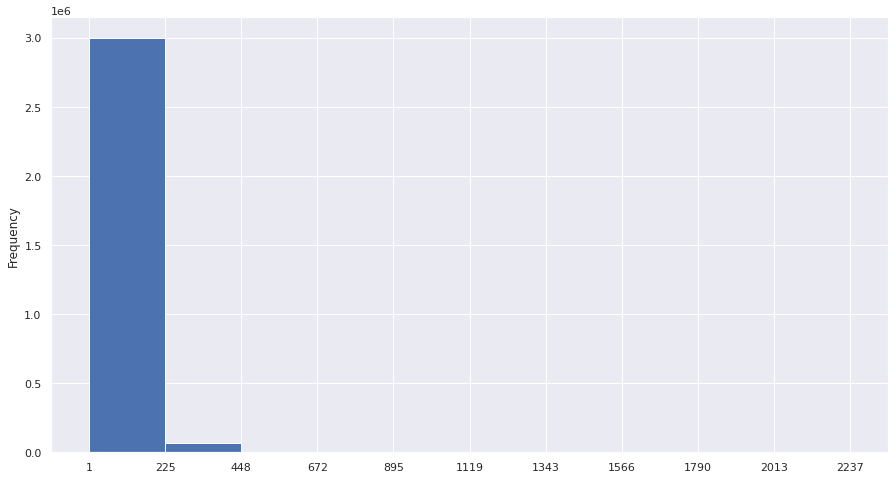

In [47]:
count, bin_edges = np.histogram(data['engine_power'])
data['engine_power'].plot(kind = 'hist', xticks= bin_edges)

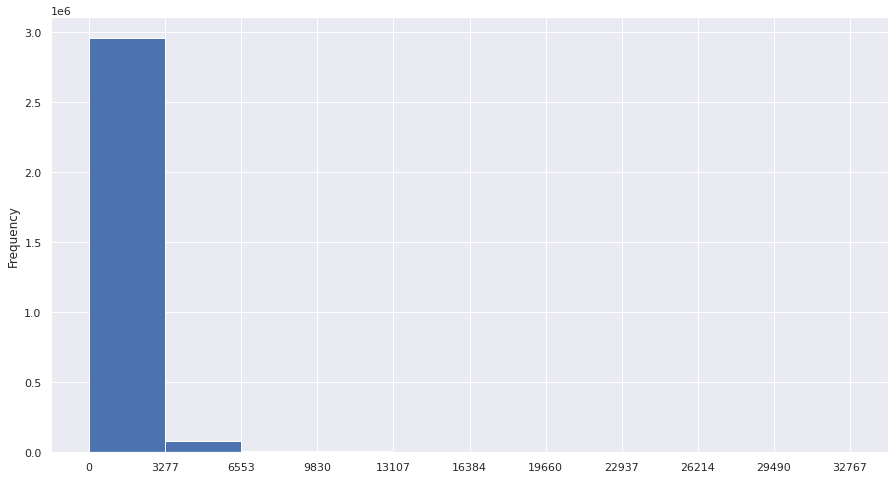

In [48]:
count, bin_edges = np.histogram(data['engine_displacement'])
data['engine_displacement'].plot(kind = 'hist', xticks= bin_edges)

- Categorical Variable => Bar chart

# Bi-variate Analysis

- Scatter plot: 
Scatter plot shows the relationship between two variable but does not indicates the strength of relationship amongst them. To find the strength of the relationship, we use Correlation. 

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3069090 entries, 0 to 3552910
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   transmission         object 
 8   door_count           int64  
 9   seat_count           float64
 10  price_eur            float64
dtypes: float64(6), int64(1), object(4)
memory usage: 281.0+ MB


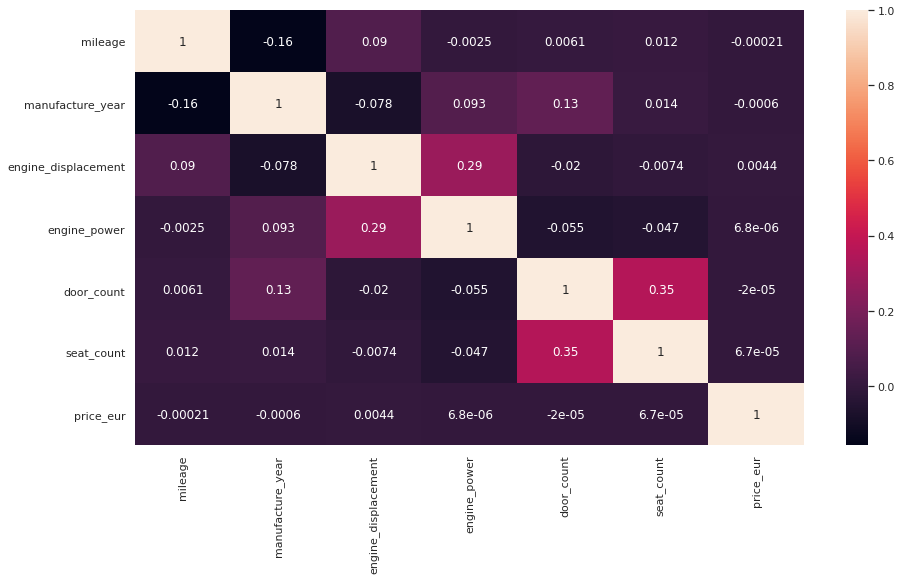

In [50]:
correlation = data.corr()
sns.heatmap(data = correlation, annot = True)

# Outlier Treatment

# Variable Transformation 

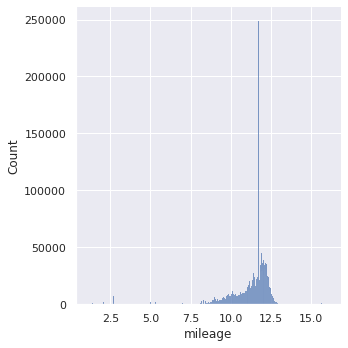

In [52]:
data['mileage'] = np.log(data['mileage'])
sns.displot(data['mileage'])

In [54]:
data['mileage'].value_counts()

11.725772    225358
2.302585      75896
4.605170      22199
11.918391     14083
1.609438      12997
              ...  
11.810159         1
12.118023         1
11.420777         1
11.540161         1
12.373340         1
Name: mileage, Length: 245555, dtype: int64

# Variable Creation